# Eigenfaces

1-a. Apply PCA to S=(1/N)AA^T

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


First, partition the provided face data into training and testing data. To do this, we need to load the given face data first.

In [ ]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt

mat_content = sio.loadmat('/content/drive/MyDrive/face.mat')

mat_content # Let's see the content...

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Sat May 27 02:07:24 2006',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[106, 130, 191, ...,  70, 183,  77],
        [103, 129, 185, ...,  62, 250,  72],
        [103, 130, 174, ...,  83, 163,  68],
        ...,
        [ 37,  40,  22, ...,  87, 102,  93],
        [ 36,  36,  19, ...,  89,  95, 103],
        [ 41,  35,  17, ...,  94, 106, 110]], dtype=uint8),
 'l': array([[ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,
          2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,
          4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,
          5,  5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,
          7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
          9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10,
         10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12,
         12, 12, 12, 12, 12, 12, 12, 12, 13,

'X' contains face data, and 'l' contains identifier.

In [ ]:
face_data = mat_content['X']

print(face_data) # Each column represents one face image, each row a pixel value for a particular coordinate of the image
print(face_data.shape)

[[106 130 191 ...  70 183  77]
 [103 129 185 ...  62 250  72]
 [103 130 174 ...  83 163  68]
 ...
 [ 37  40  22 ...  87 102  93]
 [ 36  36  19 ...  89  95 103]
 [ 41  35  17 ...  94 106 110]]
(2576, 520)


In [ ]:
face_identity = mat_content['l']

print(face_identity)
print(face_identity.shape)

[[ 1  1  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2  2  2  3  3  3  3
   3  3  3  3  3  3  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5
   5  5  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  8  8
   8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9  9  9 10 10 10 10 10 10
  10 10 10 10 11 11 11 11 11 11 11 11 11 11 12 12 12 12 12 12 12 12 12 12
  13 13 13 13 13 13 13 13 13 13 14 14 14 14 14 14 14 14 14 14 15 15 15 15
  15 15 15 15 15 15 16 16 16 16 16 16 16 16 16 16 17 17 17 17 17 17 17 17
  17 17 18 18 18 18 18 18 18 18 18 18 19 19 19 19 19 19 19 19 19 19 20 20
  20 20 20 20 20 20 20 20 21 21 21 21 21 21 21 21 21 21 22 22 22 22 22 22
  22 22 22 22 23 23 23 23 23 23 23 23 23 23 24 24 24 24 24 24 24 24 24 24
  25 25 25 25 25 25 25 25 25 25 26 26 26 26 26 26 26 26 26 26 27 27 27 27
  27 27 27 27 27 27 28 28 28 28 28 28 28 28 28 28 29 29 29 29 29 29 29 29
  29 29 30 30 30 30 30 30 30 30 30 30 31 31 31 31 31 31 31 31 31 31 32 32
  32 32 32 32 32 32 32 32 33 33 33 33 

Next, split dataset into training and testing data.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(face_data.T, face_identity.T, test_size=0.2, random_state=42)

print(X_train.shape)

(416, 2576)


Now apply PCA to training data, by computing the eigenvectors and eigenvalues of the covariance matrix S=(1/N)AA^T.

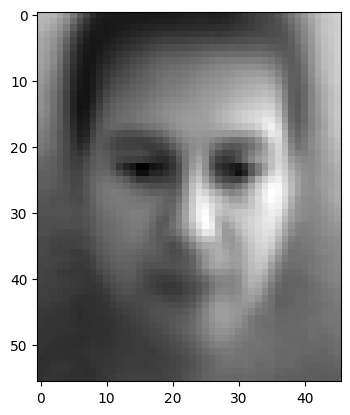

In [ ]:
# Step 1: Center the data by subtracting the mean of each feature (column)
mean = np.mean(X_train, axis=0)
centered_data = X_train - mean

# Step 2: Calculate the covariance matrix S=(1/N)AA^T
covariance_matrix = np.dot(centered_data.T, centered_data)

# Step 3: Perform eigenvalue decomposition on the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

# Let's see how mean image looks like...
plt.imshow(np.reshape(mean,(46,56)).T, cmap = 'gist_gray')

In [ ]:
print(eigenvalues.real)
print(eigenvalues.shape)

print(eigenvectors.real)
print(eigenvectors.shape)

[ 3.84810279e+08  2.21532743e+08  1.86733184e+08 ... -8.20613964e-11
 -8.22348994e-11 -5.32045254e-13]
(2576,)
[[ 1.32633609e-02 -1.02042122e-02  2.07297535e-02 ... -2.70242187e-03
   1.05898577e-03  2.72702727e-06]
 [ 1.43289992e-02 -9.04605352e-03  2.24554700e-02 ... -6.08693396e-04
  -4.24566903e-04 -8.32590808e-04]
 [ 1.49902967e-02 -6.76461690e-03  2.52007189e-02 ... -4.12607103e-04
   3.55116299e-04  1.08962807e-04]
 ...
 [-3.11900935e-03  4.65940918e-02 -1.28877270e-02 ... -1.20896681e-03
   5.87410225e-03  3.79640783e-03]
 [-2.94199093e-03  4.64623673e-02 -1.29968033e-02 ...  8.41061938e-03
  -3.50890968e-03 -1.58810352e-03]
 [-3.24891945e-03  4.69209710e-02 -1.52483281e-02 ... -1.04545929e-02
   2.85585299e-02 -3.39783608e-04]]
(2576, 2576)


Let us sort and filter out eigenvalues.

In [ ]:
# Step 4: Sort the eigenvectors by eigenvalues in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvectors = eigenvectors[:, sorted_indices]

# Step 5: Select the top k eigenvectors (where k is the number of desired components)
# You can choose the number of components you want to retain (k) based on your requirements.
# For example, if you want to reduce dimensionality, you can select a smaller k.
k = 128  # Choose an appropriate value for k

top_k_eigenvectors = eigenvectors[:, :k]

print(top_k_eigenvectors.real)

[[ 0.01326336 -0.01020421  0.02072975 ... -0.00434629  0.05376194
   0.01386962]
 [ 0.014329   -0.00904605  0.02245547 ... -0.01943898  0.0349697
  -0.01033351]
 [ 0.0149903  -0.00676462  0.02520072 ... -0.03120359  0.01509001
  -0.01566353]
 ...
 [-0.00311901  0.04659409 -0.01288773 ... -0.00610781  0.01975852
   0.01252685]
 [-0.00294199  0.04646237 -0.0129968  ...  0.05439034 -0.01893488
   0.02017662]
 [-0.00324892  0.04692097 -0.01524833 ...  0.03499624 -0.00315101
   0.00302919]]


Finally, we can project data into filtered eigenvectors to apply PCA.

In [ ]:
# Step 6: Project the centered data onto the top k eigenvectors to get the reduced-dimensional representation
reduced_data = np.dot(centered_data, top_k_eigenvectors)

print(reduced_data.shape)

(416, 128)


From the projected data, we can reconstruct image.

In [ ]:
reconstructed_data = (np.dot(reduced_data, top_k_eigenvectors.T) + mean).real

reconstruction_error = np.mean(np.square(X_train - reconstructed_data))  # Calculate the mean squared reconstruction error

# Print or use the reconstruction error as needed
print("Reconstruction Error:", reconstruction_error)

Reconstruction Error: 81.87901527640476


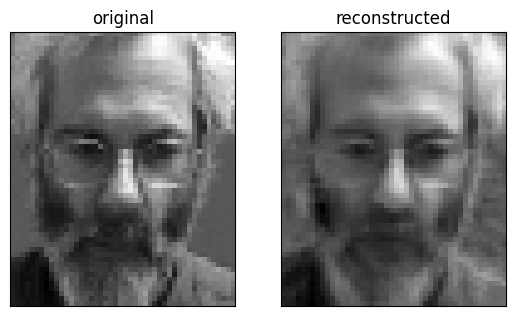

In [ ]:
original_image = X_train[42]
original_face = np.reshape(original_image,(46,56)).T

reconstructed_image = reconstructed_data[42]
reconstructed_face = np.reshape(reconstructed_image,(46,56)).T

plt.subplot(121),plt.imshow(original_face, cmap = 'gist_gray')
plt.title('original'), plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(reconstructed_face, cmap = 'gist_gray')
plt.title('reconstructed'), plt.xticks([]), plt.yticks([])

plt.show()

1-b. Apply PCA to S=(1/N)A^TA

We can get eigenvectors and eigenvalues of the matrix S=(1/N)A^TA in same way.

In [ ]:
from sklearn.preprocessing import normalize

# Step 1: Center the data by subtracting the mean of each feature (column)
mean = np.mean(X_train, axis=0)
centered_data = X_train - mean

# Step 2: Calculate the covariance matrix S=(1/N)A^TA
covariance_matrix = np.dot(centered_data, centered_data.T)

# Step 3: Perform eigenvalue decomposition on the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

After dot product with centered data, we need to normalize all vectors.

In [ ]:
eigenvectors = np.dot(centered_data.T, eigenvectors)

# Iterate through each column (vector) and normalize it
for i in range(eigenvectors.shape[1]):
    vector = eigenvectors[:, i]  # Select the i-th column (vector)
    eigenvectors[:, i] = vector / np.linalg.norm(vector)  # Update the matrix

Here, we can filter out eigenvalues like above.

In [ ]:
# Step 4: Sort the eigenvectors by eigenvalues in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Step 5: Select the top k eigenvectors (where k is the number of desired components)
# You can choose the number of components you want to retain (k) based on your requirements.
# For example, if you want to reduce dimensionality, you can select a smaller k.
k = 64  # Choose an appropriate value for k

top_k_eigenvectors = eigenvectors[:, :k]

print(top_k_eigenvectors)

[[-0.01326336 -0.01020421  0.02072975 ... -0.01904456 -0.01014906
   0.01544591]
 [-0.014329   -0.00904605  0.02245547 ... -0.01678135  0.00774502
  -0.00566642]
 [-0.0149903  -0.00676462  0.02520072 ... -0.01093418  0.02004609
  -0.01595649]
 ...
 [ 0.00311901  0.04659409 -0.01288773 ... -0.01229174 -0.02025447
   0.00588312]
 [ 0.00294199  0.04646237 -0.0129968  ... -0.0047351  -0.03800277
   0.02213851]
 [ 0.00324892  0.04692097 -0.01524833 ...  0.00113813 -0.03246014
   0.02552184]]


Finally, we can project data into filtered eigenvectors to apply PCA.

In [ ]:
# Step 6: Project the centered data onto the top k eigenvectors to get the reduced-dimensional representation
reduced_train_data = np.dot(centered_data, top_k_eigenvectors)

print(reduced_train_data.shape)

(416, 64)


In [ ]:
reconstructed_data = np.dot(reduced_train_data, top_k_eigenvectors.T) + mean

reconstruction_error = np.mean(np.square(X_train - reconstructed_data))  # Calculate the mean squared reconstruction error

# Print or use the reconstruction error as needed
print("Reconstruction Error:", reconstruction_error)

Reconstruction Error: 175.90564507818965


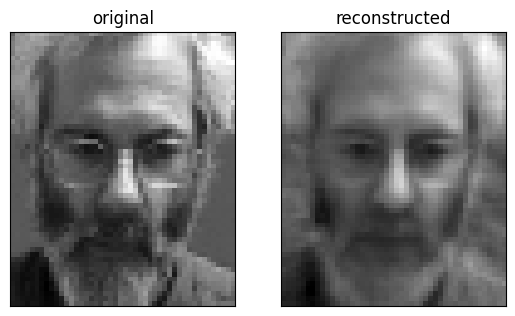

In [ ]:
original_image = X_train[42]
original_face = np.reshape(original_image,(46,56)).T

reconstructed_image = reconstructed_data[42]
reconstructed_face = np.reshape(reconstructed_image,(46,56)).T

plt.subplot(121),plt.imshow(original_face, cmap = 'gist_gray')
plt.title('original'), plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(reconstructed_face, cmap = 'gist_gray')
plt.title('reconstructed'), plt.xticks([]), plt.yticks([])

plt.show()

Let's plot the reconstruction error graph.

In [ ]:
number_of_basis_list = range(5, 416, 5)
err_result = []

# Step 1: Center the data by subtracting the mean of each feature (column)
mean = np.mean(X_train, axis=0)
centered_data = X_train - mean

# Step 2: Calculate the covariance matrix S=(1/N)A^TA
covariance_matrix = np.dot(centered_data, centered_data.T)

# Step 3: Perform eigenvalue decomposition on the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

eigenvectors = np.dot(centered_data.T, eigenvectors)

# Iterate through each column (vector) and normalize it
for i in range(eigenvectors.shape[1]):
    vector = eigenvectors[:, i]  # Select the i-th column (vector)
    eigenvectors[:, i] = vector / np.linalg.norm(vector)  # Update the matrix

# Step 4: Sort the eigenvectors by eigenvalues in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

for number_of_basis in number_of_basis_list:
  # Step 5: Select the top k eigenvectors (where k is the number of desired components)
  # You can choose the number of components you want to retain (k) based on your requirements.
  # For example, if you want to reduce dimensionality, you can select a smaller k.
  k = number_of_basis  # Choose an appropriate value for k

  top_k_eigenvectors = eigenvectors[:, :k]

  # Step 6: Project the centered data onto the top k eigenvectors to get the reduced-dimensional representation
  reduced_train_data = np.dot(centered_data, top_k_eigenvectors)

  reconstructed_data = np.dot(reduced_train_data, top_k_eigenvectors.T) + mean

  reconstruction_error = np.mean(np.square(X_train - reconstructed_data))  # Calculate the mean squared reconstruction error

  # Print or use the reconstruction error as needed
  print("Reconstruction Error:", reconstruction_error)

  err_result.append(reconstruction_error)

Reconstruction Error: 804.7408724885488
Reconstruction Error: 583.1897287064417
Reconstruction Error: 478.440810227424
Reconstruction Error: 407.19024892490904
Reconstruction Error: 357.1864169871268
Reconstruction Error: 318.02636030042015
Reconstruction Error: 285.6497576019632
Reconstruction Error: 259.275497142063
Reconstruction Error: 236.98797869685725
Reconstruction Error: 217.76724416649859
Reconstruction Error: 201.06018560613987
Reconstruction Error: 186.45351556864478
Reconstruction Error: 173.3964063464561
Reconstruction Error: 161.74209814311956
Reconstruction Error: 151.32998618245398
Reconstruction Error: 141.7634365633528
Reconstruction Error: 133.20315197063854
Reconstruction Error: 125.39863201663692
Reconstruction Error: 118.17765328827639
Reconstruction Error: 111.54418776772863
Reconstruction Error: 105.36630100316874
Reconstruction Error: 99.63658853487568
Reconstruction Error: 94.30478575707434
Reconstruction Error: 89.2941786618061
Reconstruction Error: 84.58344

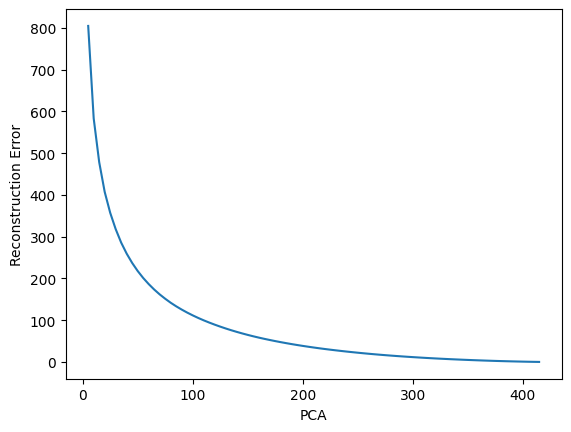

In [ ]:
plt.plot(number_of_basis_list, err_result)

plt.ylabel('Reconstruction Error')
plt.xlabel('PCA')

plt.show()

# Application of Eigenfaces

From the data partition above, let us perform the face image reconstruction using PCA bases learnt.

In [ ]:
# Project the centered data onto the top k eigenvectors to get the reduced-dimensional representation
reduced_test_data = np.dot(X_test - mean, top_k_eigenvectors)

reconstructed_data = np.dot(reduced_test_data, top_k_eigenvectors.T) + mean

reconstruction_error = np.mean(np.square(X_test - reconstructed_data))  # Calculate the mean squared reconstruction error

# Print or use the reconstruction error as needed
print("Reconstruction Error:", reconstruction_error)

Reconstruction Error: 97.7496606540799


Let's see an example of reconstruction result.

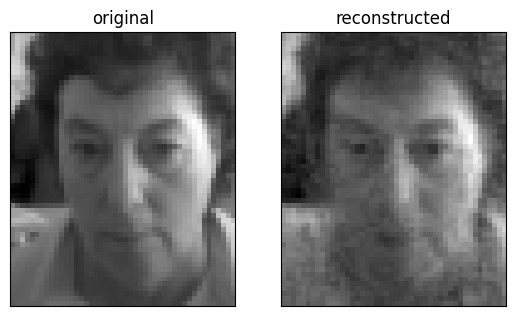

In [ ]:
original_image = X_test[42]
original_face = np.reshape(original_image,(46,56)).T

reconstructed_image = reconstructed_data[42]
reconstructed_face = np.reshape(reconstructed_image,(46,56)).T

plt.subplot(121),plt.imshow(original_face, cmap = 'gist_gray')
plt.title('original'), plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(reconstructed_face, cmap = 'gist_gray')
plt.title('reconstructed'), plt.xticks([]), plt.yticks([])

plt.show()

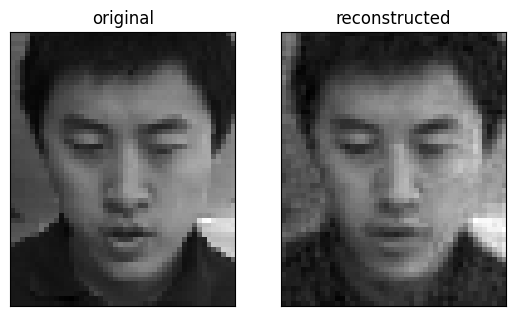

In [ ]:
original_image = X_test[13]
original_face = np.reshape(original_image,(46,56)).T

reconstructed_image = reconstructed_data[13]
reconstructed_face = np.reshape(reconstructed_image,(46,56)).T

plt.subplot(121),plt.imshow(original_face, cmap = 'gist_gray')
plt.title('original'), plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(reconstructed_face, cmap = 'gist_gray')
plt.title('reconstructed'), plt.xticks([]), plt.yticks([])

plt.show()

We can train KNN classifier with PCA results.

In [ ]:
# KNN Classifer
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
number_of_basis = 335

# Step 1: Center the data by subtracting the mean of each feature (column)
mean = np.mean(X_train, axis=0)
centered_data = X_train - mean

# Step 2: Calculate the covariance matrix S=(1/N)A^TA
covariance_matrix = np.dot(centered_data, centered_data.T)

# Step 3: Perform eigenvalue decomposition on the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

eigenvectors = np.dot(centered_data.T, eigenvectors)

# Iterate through each column (vector) and normalize it
for i in range(eigenvectors.shape[1]):
    vector = eigenvectors[:, i]  # Select the i-th column (vector)
    eigenvectors[:, i] = vector / np.linalg.norm(vector)  # Update the matrix

# Step 4: Sort the eigenvectors by eigenvalues in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Step 5: Select the top k eigenvectors (where k is the number of desired components)
# You can choose the number of components you want to retain (k) based on your requirements.
# For example, if you want to reduce dimensionality, you can select a smaller k.
k = number_of_basis  # Choose an appropriate value for k

top_k_eigenvectors = eigenvectors[:, :k]

# Step 6: Project the centered data onto the top k eigenvectors to get the reduced-dimensional representation
reduced_train_data = np.dot(centered_data, top_k_eigenvectors)
reduced_test_data = np.dot(X_test - mean, top_k_eigenvectors)

# train KNN with reduced data set
nn = KNeighborsClassifier(n_neighbors=1)
nn.fit(reduced_train_data, y_train.T.ravel())

# test with trained KNN
acc = nn.score(reduced_test_data, y_test.T.ravel())

print("Test Accuracy: ", acc)

Test Accuracy:  0.6057692307692307


Here we can get confusion matrix report.

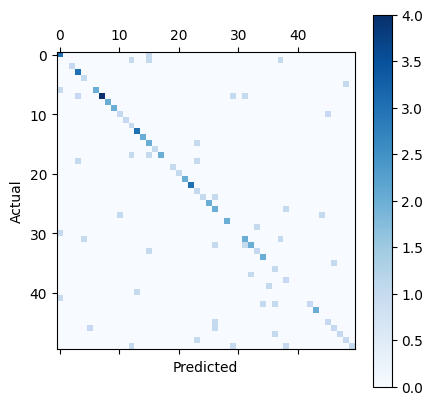

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

y_pred = nn.predict(reduced_test_data)
cfn_matrix = confusion_matrix(y_test, y_pred)

plt.matshow(cfn_matrix, cmap = 'Blues')

plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.show()

We will vary number of basis to get insights from the experiment.

In [ ]:
import time

In [ ]:
number_of_basis_list = range(5, 416, 5)
accuracy_result = []
time_cosume_result = []

# Step 1: Center the data by subtracting the mean of each feature (column)
mean = np.mean(X_train, axis=0)
centered_data = X_train - mean

# Step 2: Calculate the covariance matrix S=(1/N)A^TA
covariance_matrix = np.dot(centered_data, centered_data.T)

# Step 3: Perform eigenvalue decomposition on the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

eigenvectors = np.dot(centered_data.T, eigenvectors)

# Iterate through each column (vector) and normalize it
for i in range(eigenvectors.shape[1]):
    vector = eigenvectors[:, i]  # Select the i-th column (vector)
    eigenvectors[:, i] = vector / np.linalg.norm(vector)  # Update the matrix

# Step 4: Sort the eigenvectors by eigenvalues in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

for number_of_basis in number_of_basis_list:
  # Step 5: Select the top k eigenvectors (where k is the number of desired components)
  # You can choose the number of components you want to retain (k) based on your requirements.
  # For example, if you want to reduce dimensionality, you can select a smaller k.
  k = number_of_basis  # Choose an appropriate value for k

  top_k_eigenvectors = eigenvectors[:, :k]

  # Step 6: Project the centered data onto the top k eigenvectors to get the reduced-dimensional representation
  reduced_train_data = np.dot(centered_data, top_k_eigenvectors)
  reduced_test_data = np.dot(X_test - mean, top_k_eigenvectors)

  start_time = time.time()

  # train KNN with reduced data set
  nn = KNeighborsClassifier(n_neighbors=1)
  nn.fit(reduced_train_data, y_train.T.ravel())

  end_time = time.time()

  # test with trained KNN
  acc = nn.score(reduced_test_data, y_test.T.ravel())

  print("Test Accuracy: ", acc)

  accuracy_result.append(acc)

  print("train time consumed: ", end_time - start_time)

  time_cosume_result.append(end_time - start_time)

Test Accuracy:  0.3557692307692308
train time consumed:  0.0016021728515625
Test Accuracy:  0.3557692307692308
train time consumed:  0.0016181468963623047
Test Accuracy:  0.49038461538461536
train time consumed:  0.0017025470733642578
Test Accuracy:  0.5096153846153846
train time consumed:  0.001010894775390625
Test Accuracy:  0.5288461538461539
train time consumed:  0.0011768341064453125
Test Accuracy:  0.5288461538461539
train time consumed:  0.0010745525360107422
Test Accuracy:  0.5384615384615384
train time consumed:  0.0011851787567138672
Test Accuracy:  0.5384615384615384
train time consumed:  0.0009260177612304688
Test Accuracy:  0.5576923076923077
train time consumed:  0.0010542869567871094
Test Accuracy:  0.5576923076923077
train time consumed:  0.0010576248168945312
Test Accuracy:  0.5576923076923077
train time consumed:  0.0010945796966552734
Test Accuracy:  0.5865384615384616
train time consumed:  0.0009732246398925781
Test Accuracy:  0.5769230769230769
train time consumed:

And we can find maximum accuracy from the test.

In [ ]:
# Find the index of the maximum accuracy value
max_A_index = np.argmax(accuracy_result)

# Find the corresponding (K, D) pair for the maximum A
max_K = number_of_basis_list[max_A_index]
max_T = time_cosume_result[max_A_index]
max_A = accuracy_result[max_A_index]

print(f"Maximum A: {max_A}")
print(f"Corresponding (K, D) pair: ({max_K}, {max_T})")

Maximum A: 0.6057692307692307
Corresponding (K, D) pair: (335, 0.0013041496276855469)


Let's see corresponding result graphs.

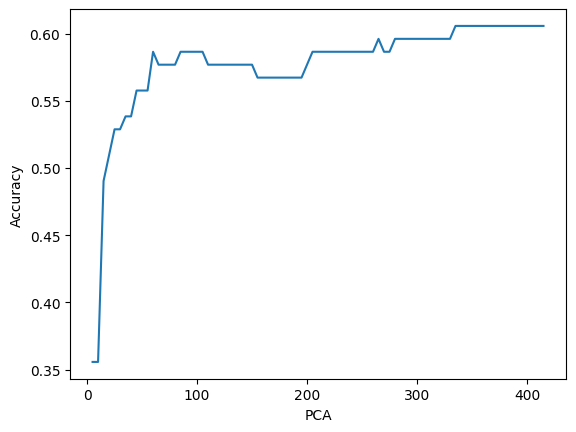

In [ ]:
plt.plot(number_of_basis_list, accuracy_result)

plt.ylabel('Accuracy')
plt.xlabel('PCA')

plt.show()

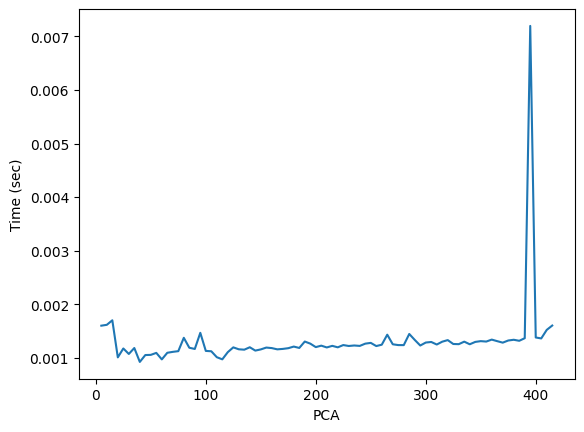

In [ ]:
plt.plot(number_of_basis_list, time_cosume_result)

plt.ylabel('Time (sec)')
plt.xlabel('PCA')

plt.show()

Finally, let's find some example success / failure cases.

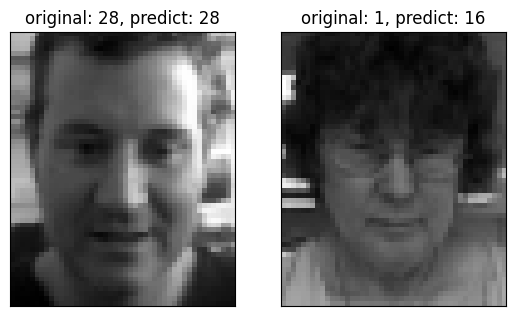

In [ ]:
# find success case
for index in range(len(number_of_basis_list)):
  if y_test[index] == y_pred[index]:
    original_image = X_test[index]
    original_face = np.reshape(original_image,(46,56)).T

    plt.subplot(121),plt.imshow(original_face, cmap = 'gist_gray')
    plt.title('original: %d, predict: %d' % (y_test[index], y_pred[index])), plt.xticks([]), plt.yticks([])
    break

# find failure case
for index in range(len(number_of_basis_list)):
  if y_test[index] != y_pred[index]:
    original_image = X_test[index]
    original_face = np.reshape(original_image,(46,56)).T

    plt.subplot(122),plt.imshow(original_face, cmap = 'gist_gray')
    plt.title('original: %d, predict: %d' % (y_test[index], y_pred[index])), plt.xticks([]), plt.yticks([])
    break

plt.show()

# Incremental PCA

Here now we will try incremental PCA to reduce overfitting. Start from dividing train set into 4.

In [ ]:
number_of_basis = 335

# Step 1: Center the data by subtracting the mean of each feature (column)
mean = np.mean(X_train, axis=0)
centered_data = X_train - mean

# Step 2: Calculate the covariance matrix S=(1/N)A^TA
covariance_matrix = np.dot(centered_data, centered_data.T)

# Step 3: Perform eigenvalue decomposition on the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

eigenvectors = np.dot(centered_data.T, eigenvectors)

# Iterate through each column (vector) and normalize it
for i in range(eigenvectors.shape[1]):
    vector = eigenvectors[:, i]  # Select the i-th column (vector)
    eigenvectors[:, i] = vector / np.linalg.norm(vector)  # Update the matrix

# Step 4: Sort the eigenvectors by eigenvalues in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Step 5: Select the top k eigenvectors (where k is the number of desired components)
# You can choose the number of components you want to retain (k) based on your requirements.
# For example, if you want to reduce dimensionality, you can select a smaller k.
k = number_of_basis  # Choose an appropriate value for k

top_k_eigenvectors = eigenvectors[:, :k]

# Step 6: Project the centered data onto the top k eigenvectors to get the reduced-dimensional representation
reduced_train_data = np.dot(centered_data, top_k_eigenvectors)
reduced_test_data = np.dot(X_test - mean, top_k_eigenvectors)

In [ ]:
# Train the model incrementally on each subset
for index in range(1, 5):
  # Split the training data into four subsets
  subset_size = (len(reduced_train_data) // 4) * index
  subsets = reduced_train_data[:subset_size]
  subset_labels = y_train[:subset_size]

  # train KNN with reduced data set
  nn = KNeighborsClassifier(n_neighbors=1)

  print(f"Training on Subset {i + 1}...")
  nn.fit(subsets, subset_labels.T.ravel())

  # Evaluate the model on the test data after each subset
  test_accuracy = nn.score(reduced_test_data, y_test.T.ravel())
  print(f'Test accuracy after Subset {i + 1}: {test_accuracy}')

Training on Subset 416...
Test accuracy after Subset 416: 0.28846153846153844
Training on Subset 416...
Test accuracy after Subset 416: 0.3942307692307692
Training on Subset 416...
Test accuracy after Subset 416: 0.5192307692307693
Training on Subset 416...
Test accuracy after Subset 416: 0.6057692307692307


We performed incremental PCA, so let's vary inputs to find some results.

In [ ]:
number_of_basis_list = range(5, 416, 5)
accuracy_result_incremental = []
time_cosume_result_incremental = []

# Step 1: Center the data by subtracting the mean of each feature (column)
mean = np.mean(X_train, axis=0)
centered_data = X_train - mean

# Step 2: Calculate the covariance matrix S=(1/N)A^TA
covariance_matrix = np.dot(centered_data, centered_data.T)

# Step 3: Perform eigenvalue decomposition on the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

eigenvectors = np.dot(centered_data.T, eigenvectors)

# Iterate through each column (vector) and normalize it
for i in range(eigenvectors.shape[1]):
    vector = eigenvectors[:, i]  # Select the i-th column (vector)
    eigenvectors[:, i] = vector / np.linalg.norm(vector)  # Update the matrix

# Step 4: Sort the eigenvectors by eigenvalues in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

for number_of_basis in number_of_basis_list:
  # Step 5: Select the top k eigenvectors (where k is the number of desired components)
  # You can choose the number of components you want to retain (k) based on your requirements.
  # For example, if you want to reduce dimensionality, you can select a smaller k.
  k = number_of_basis  # Choose an appropriate value for k

  top_k_eigenvectors = eigenvectors[:, :k]

  # Step 6: Project the centered data onto the top k eigenvectors to get the reduced-dimensional representation
  reduced_train_data = np.dot(centered_data, top_k_eigenvectors)
  reduced_test_data = np.dot(X_test - mean, top_k_eigenvectors)

  time_consume = 0

  # Train the model incrementally on each subset
  for index in range(1, 5):
    # Split the training data into four subsets
    subset_size = (len(reduced_train_data) // 4) * index
    subsets = reduced_train_data[:subset_size]
    subset_labels = y_train[:subset_size]

    # train KNN with reduced data set
    nn = KNeighborsClassifier(n_neighbors=1)

    start_time = time.time()

    print(f"Training on Subset {index}...")
    nn.fit(subsets, subset_labels.T.ravel())

    end_time = time.time()

    # Evaluate the model on the test data after each subset
    test_accuracy = nn.score(reduced_test_data, y_test.T.ravel())
    print(f'Test accuracy after Subset {index}: {test_accuracy}')

    time_consume += end_time - start_time

  # test with trained KNN
  acc = nn.score(reduced_test_data, y_test.T.ravel())

  print("Test Accuracy: ", acc)

  accuracy_result_incremental.append(acc)

  print("train time consumed: ", time_consume)

  time_cosume_result_incremental.append(time_consume)

Training on Subset 1...
Test accuracy after Subset 1: 0.20192307692307693
Training on Subset 2...
Test accuracy after Subset 2: 0.20192307692307693
Training on Subset 3...
Test accuracy after Subset 3: 0.2692307692307692
Training on Subset 4...
Test accuracy after Subset 4: 0.3557692307692308
Test Accuracy:  0.3557692307692308
train time consumed:  0.008204221725463867
Training on Subset 1...
Test accuracy after Subset 1: 0.22115384615384615
Training on Subset 2...
Test accuracy after Subset 2: 0.25
Training on Subset 3...
Test accuracy after Subset 3: 0.3173076923076923
Training on Subset 4...
Test accuracy after Subset 4: 0.3557692307692308
Test Accuracy:  0.3557692307692308
train time consumed:  0.008993387222290039
Training on Subset 1...
Test accuracy after Subset 1: 0.25
Training on Subset 2...
Test accuracy after Subset 2: 0.2692307692307692
Training on Subset 3...
Test accuracy after Subset 3: 0.3942307692307692
Training on Subset 4...
Test accuracy after Subset 4: 0.4903846153

...and only the first subest of the incremental method.

In [ ]:
number_of_basis_list = range(5, 416, 5)
accuracy_result_subset = []
time_cosume_result_subset = []

# Step 1: Center the data by subtracting the mean of each feature (column)
mean = np.mean(X_train, axis=0)
centered_data = X_train - mean

# Step 2: Calculate the covariance matrix S=(1/N)A^TA
covariance_matrix = np.dot(centered_data, centered_data.T)

# Step 3: Perform eigenvalue decomposition on the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

eigenvectors = np.dot(centered_data.T, eigenvectors)

# Iterate through each column (vector) and normalize it
for i in range(eigenvectors.shape[1]):
    vector = eigenvectors[:, i]  # Select the i-th column (vector)
    eigenvectors[:, i] = vector / np.linalg.norm(vector)  # Update the matrix

# Step 4: Sort the eigenvectors by eigenvalues in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

for number_of_basis in number_of_basis_list:
  # Step 5: Select the top k eigenvectors (where k is the number of desired components)
  # You can choose the number of components you want to retain (k) based on your requirements.
  # For example, if you want to reduce dimensionality, you can select a smaller k.
  k = number_of_basis  # Choose an appropriate value for k

  top_k_eigenvectors = eigenvectors[:, :k]

  # Step 6: Project the centered data onto the top k eigenvectors to get the reduced-dimensional representation
  reduced_train_data = np.dot(centered_data, top_k_eigenvectors)
  reduced_test_data = np.dot(X_test - mean, top_k_eigenvectors)

  time_consume = 0

  # Train the model incrementally on each subset
  for index in range(1, 2):
    # Split the training data into four subsets
    subset_size = (len(reduced_train_data) // 4) * index
    subsets = reduced_train_data[:subset_size]
    subset_labels = y_train[:subset_size]

    # train KNN with reduced data set
    nn = KNeighborsClassifier(n_neighbors=1)

    start_time = time.time()

    print(f"Training on Subset {index}...")
    nn.fit(subsets, subset_labels.T.ravel())

    end_time = time.time()

    # Evaluate the model on the test data after each subset
    test_accuracy = nn.score(reduced_test_data, y_test.T.ravel())
    print(f'Test accuracy after Subset {index}: {test_accuracy}')

    time_consume += end_time - start_time

  # test with trained KNN
  acc = nn.score(reduced_test_data, y_test.T.ravel())

  print("Test Accuracy: ", acc)

  accuracy_result_subset.append(acc)

  print("train time consumed: ", time_consume)

  time_cosume_result_subset.append(time_consume)

Training on Subset 1...
Test accuracy after Subset 1: 0.20192307692307693
Test Accuracy:  0.20192307692307693
train time consumed:  0.002168893814086914
Training on Subset 1...
Test accuracy after Subset 1: 0.22115384615384615
Test Accuracy:  0.22115384615384615
train time consumed:  0.001676797866821289
Training on Subset 1...
Test accuracy after Subset 1: 0.25
Test Accuracy:  0.25
train time consumed:  0.00191497802734375
Training on Subset 1...
Test accuracy after Subset 1: 0.25
Test Accuracy:  0.25
train time consumed:  0.0020322799682617188
Training on Subset 1...
Test accuracy after Subset 1: 0.25961538461538464
Test Accuracy:  0.25961538461538464
train time consumed:  0.0019297599792480469
Training on Subset 1...
Test accuracy after Subset 1: 0.2692307692307692
Test Accuracy:  0.2692307692307692
train time consumed:  0.0017216205596923828
Training on Subset 1...
Test accuracy after Subset 1: 0.27884615384615385
Test Accuracy:  0.27884615384615385
train time consumed:  0.00141882

We got all results from above, so let's draw graphs to visualize things.

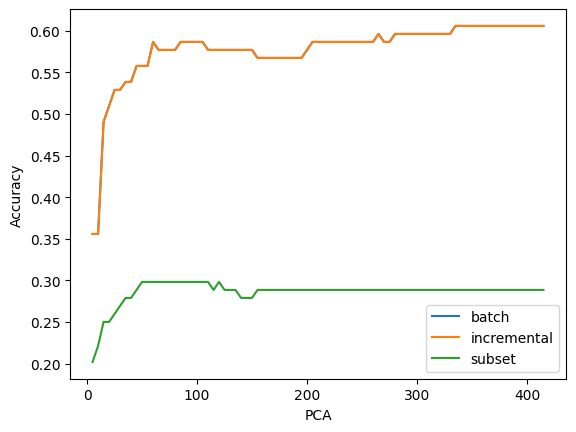

In [ ]:
plt.plot(number_of_basis_list, accuracy_result)
plt.plot(number_of_basis_list, accuracy_result_incremental)
plt.plot(number_of_basis_list, accuracy_result_subset)

plt.ylabel('Accuracy')
plt.xlabel('PCA')

plt.legend(['batch', 'incremental', 'subset'])

plt.show()

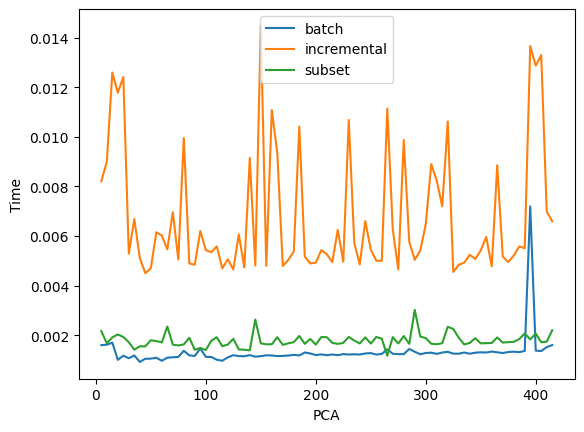

In [ ]:
plt.plot(number_of_basis_list, time_cosume_result)
plt.plot(number_of_basis_list, time_cosume_result_incremental)
plt.plot(number_of_basis_list, time_cosume_result_subset)

plt.ylabel('Time')
plt.xlabel('PCA')

plt.legend(['batch', 'incremental', 'subset'])

plt.show()